## Decisive Distributions

### Import Dependencies

In [1]:
# Import libraries and dependencies
import os
import pandas as pd
# import alpaca_trade_api as tradeapi
import yfinance as yf

# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

%matplotlib inline

Hello


In [6]:
# Setup Alpaca API environment
# yahoo_api_key = os.getenv("ALPACA_API_KEY")
# yahoo_secret_key = os.getenv("ALPACA_SECRET_KEY")

# api = tradeapi.REST(
#     alpaca_api_key,
#     alpaca_secret_key,
#     api_version="v2"
# )

### Read in stock data using Alpaca API

In [33]:
# Set timeframe to "1Day"
# timeframe = "1Day"

# Set start and end datetimes of 1 year, between now and 365 days ago.
# start_date = pd.Timestamp("2019-05-01", tz="America/New_York").isoformat()
# end_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()

# Set the stock tickers
tickers = ['SPY', 'LUV', 'DIS', 'AAPL', 'SBUX'] #remove WORK

# Get 1 year's worth of historical data for all stocks
# HINT: Set "limit" to 10000 so all ticker rows are captured from get_bars()
# YOUR CODE HERE!
df_ticker = yf.download(tickers, period='1y').dropna(axis=1, how='all')

# Display sample data
df_ticker.head()

[*********************100%***********************]  5 of 5 completed


Adj Close                                                 \
                  AAPL         DIS        LUV        SBUX         SPY   
Date                                                                    
2021-12-16  171.266006  148.750000  39.529999  110.953056  459.496887   
2021-12-17  170.152466  148.759995  39.660000  106.108200  454.606476   
2021-12-20  168.770493  146.470001  39.360001  105.580727  449.772491   
2021-12-21  171.991806  151.050003  40.869999  107.807808  457.760010   
2021-12-22  174.626511  151.880005  41.119999  109.145996  462.337006   

                 Close                                                 ...  \
                  AAPL         DIS        LUV        SBUX         SPY  ...   
Date                                                                   ...   
2021-12-16  172.259995  148.750000  39.529999  113.589996  466.450012  ...   
2021-12-17  171.139999  148.759995  39.660000  108.629997  459.869995  ...   
2021-12-20  169.750000  146.470001  39.360001  108.089996  454.980011  ...   
2021-12-21  172.990005  151.050003  40.869999  110.370003  463.059998  ...   
2021-12-22  175.639999  151.880005  41.119999  111.739998  467.690002  ...   

                  Open                                                 \
                  AAPL         DIS        LUV        SBUX         SPY   
Date                                                                    
2021-12-16  179.279999  151.350006  40.740002  115.000000  472.570007   
2021-12-17  169.929993  148.509995  39.480000  111.269997  461.549988   
2021-12-20  168.279999  146.979996  38.910000  107.070000  454.480011   
2021-12-21  171.559998  147.559998  39.720001  109.000000  458.609985   
2021-12-22  173.039993  150.419998  40.849998  110.199997  462.790009   

               Volume                                           
                 AAPL       DIS       LUV      SBUX        SPY  
Date                                                            
2021-12-16  150185800  11145600  13408000   7544400  116568600  
2021-12-17  195432700  13785000  15175600  13696900  135511600  
2021-12-20  107499100  11201900  12253100   6313700  107134800  
2021-12-21   91185900  10781400  12569900   4682200   69806300  
2021-12-22   92135300   7820400   8616000   3643300   58890200  

[5 rows x 30 columns]

In [34]:
# Reorganize the DataFrame
# Separate ticker data
# SPY = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis=1)
# LUV = df_ticker[df_ticker['symbol']=='LUV'].drop('symbol', axis=1)
# DIS = df_ticker[df_ticker['symbol']=='DIS'].drop('symbol', axis=1)
# AAPL = df_ticker[df_ticker['symbol']=='AAPL'].drop('symbol', axis=1)
# SBUX = df_ticker[df_ticker['symbol']=='SBUX'].drop('symbol', axis=1)
# WORK = df_ticker[df_ticker['symbol']=='WORK'].drop('symbol', axis=1)
SPY = yf.download('SPY', period='1y')
LUV = yf.download('LUV', period='1y')
DIS = yf.download('DIS', period='1y')
AAPL = yf.download('AAPL', period='1y')
SBUX = yf.download('SBUX', period='1y')
# WORK = yf.download('WORK', period='1y')

# Concatenate the ticker DataFrames
df_ticker = pd.concat([SPY, LUV, DIS, AAPL, SBUX], axis=1, keys=["SPY", "LUV", "DIS", "AAPL", "SBUX", "WORK"])
# Display sample data
df_ticker.head()
# SPY.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


SPY                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2021-12-16  472.570007  472.869995  464.799988  466.450012  459.496887   
2021-12-17  461.549988  464.739990  458.059998  459.869995  454.606476   
2021-12-20  454.480011  455.399994  451.140015  454.980011  449.772491   
2021-12-21  458.609985  463.209991  456.309998  463.059998  457.760010   
2021-12-22  462.790009  467.809998  462.579987  467.690002  462.337006   

                             LUV                                   ...  \
               Volume       Open       High        Low      Close  ...   
Date                                                               ...   
2021-12-16  116568600  40.740002  40.750000  39.400002  39.529999  ...   
2021-12-17  135511600  39.480000  40.490002  39.080002  39.660000  ...   
2021-12-20  107134800  38.910000  39.959999  38.660000  39.360001  ...   
2021-12-21   69806300  39.720001  41.410000  39.639999  40.869999  ...   
2021-12-22   58890200  40.849998  41.599998  40.459999  41.119999  ...   

                  AAPL                                           SBUX  \
                   Low       Close   Adj Close     Volume        Open   
Date                                                                    
2021-12-16  170.750000  172.259995  171.266006  150185800  115.000000   
2021-12-17  169.690002  171.139999  170.152466  195432700  111.269997   
2021-12-20  167.460007  169.750000  168.770493  107499100  107.070000   
2021-12-21  169.119995  172.990005  171.991806   91185900  109.000000   
2021-12-22  172.149994  175.639999  174.626495   92135300  110.199997   

                                                                      
                  High         Low       Close   Adj Close    Volume  
Date                                                                  
2021-12-16  115.400002  113.220001  113.589996  110.953041   7544400  
2021-12-17  111.800003  108.220001  108.629997  106.108185  13696900  
2021-12-20  108.120003  106.610001  108.089996  105.580727   6313700  
2021-12-21  110.900002  108.870003  110.370003  107.807800   4682200  
2021-12-22  111.779999  110.000000  111.739998  109.146004   3643300  

[5 rows x 30 columns]

### Create a new DataFrame and store the closing prices of each stock.

In [37]:
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices for all the tickers
df_closing_prices = df_ticker.xs('Close', level=1, axis=1)

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Display sample data
df_closing_prices.head()

,SPY,LUV,DIS,AAPL,SBUX
2021-12-16,466.450012,39.529999,148.750000,172.259995,113.589996
2021-12-17,459.869995,39.660000,148.759995,171.139999,108.629997
2021-12-20,454.980011,39.360001,146.470001,169.750000,108.089996
2021-12-21,463.059998,40.869999,151.050003,172.990005,110.370003
2021-12-22,467.690002,41.119999,151.880005,175.639999,111.739998


### Calculate the daily returns for each stock using the `pct_change()` function

In [6]:
# Compute daily returns
# YOUR CODE HERE!

# Display sample data
df_daily_returns.head()

,SPY,LUV,DIS,AAPL,SBUX,WORK
2019-06-21,-0.006354,-0.005241,-0.012604,-0.003409,-0.010273,-0.036251
2019-06-24,-0.001156,-0.000585,-0.007202,-0.001006,-0.002028,-0.039226
2019-06-25,-0.009807,-0.004295,0.005172,-0.015158,0.007173,-0.015660
2019-06-26,-0.000929,-0.005882,0.003287,0.021629,-0.010326,0.056534
2019-06-27,0.003477,0.000789,-0.007835,-0.000300,0.002159,-0.025276


### Plot Distributions

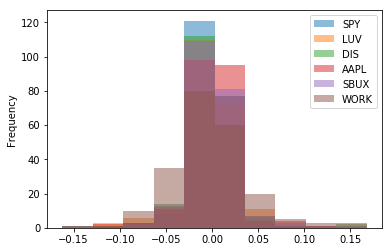

In [7]:
# Visualize the distribution of daily returns across all stocks using a histogram plot
# Hint: To make the plot easier to read, set the alpha arguement to 0.5
# YOUR CODE HERE!

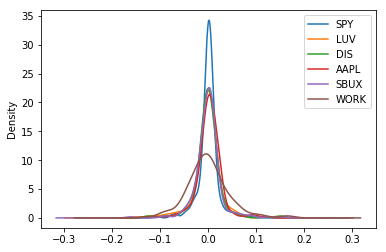

In [8]:
# Visualize the distribution of daily returns across all stocks using a density plot
# YOUR CODE HERE!